# Ensembles
As you have undoubtedly noticed, different classifiers tend to give different results on different problems and the same applies for the same classifier on different subsets or even feature subsets of the same data.  After working with Random Forests, you may have begun to suspect that there ought to be a way to combine or average the results of different classifiers to produce an even better classification algorithm.  This topic is generally referred to as ensemble methods which branches out into many different techniques, several of which we will explore in this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier,\
                            AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Voting
One such ensemble method is voting.  The idea here is to have each classifier in the ensemble vote on the classification of a new data point, and then tally up the votes, or average the probabilities, and classify the point accordingly, the former being called "hard" and latter "soft" voting.  An algorithm like this wouldn't be too hard to write ourselves, but `sklearn` provides a very nice framework for us.

1 - Create a set of 100 datapoints which are linearly separable, classifying the data as being above or below the curve.  Choose three classification algorithms, construct hard and soft ensemble voters, and fit all 5 models to your data, plotting the decision boundary for each (if possible).  Then, using cross-validation, report the training and testing accuracies for all but the ensembles.  Comment on your results.

In [23]:
np.random.seed(0)
# random points between -5 and 5
x1 = 10*np.random.rand(100) - 5
x2 = 10*np.random.rand(100) - 5
X = np.vstack([x1, x2]).T
# line y = -x
y = np.array(x2 < -x1, dtype=int)

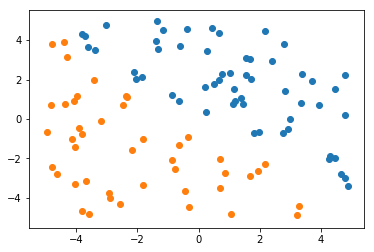

In [24]:
# plot the dataset
plt.scatter(x1[y==0], x2[y==0])
plt.scatter(x1[y==1], x2[y==1]);

In [27]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
hard = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('tree', tree)], voting='hard')
soft = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('tree', tree)], voting='soft')

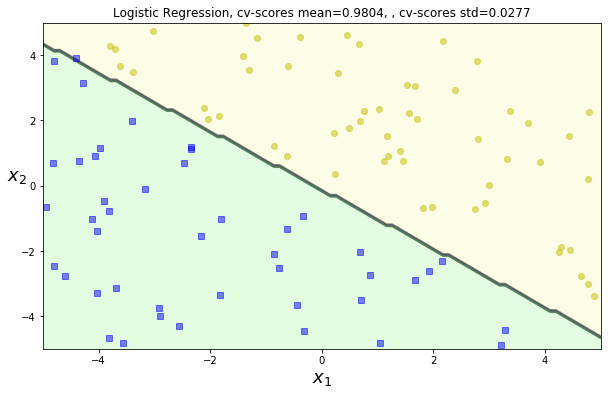

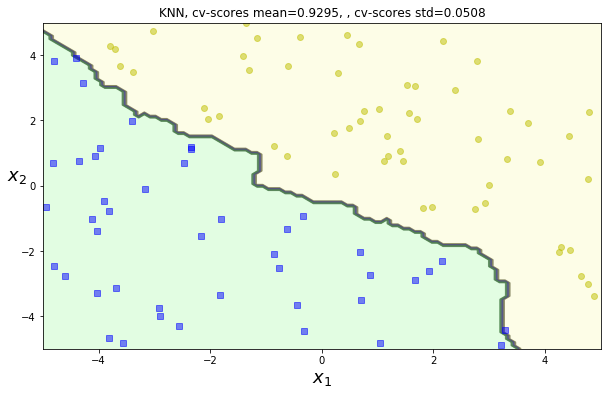

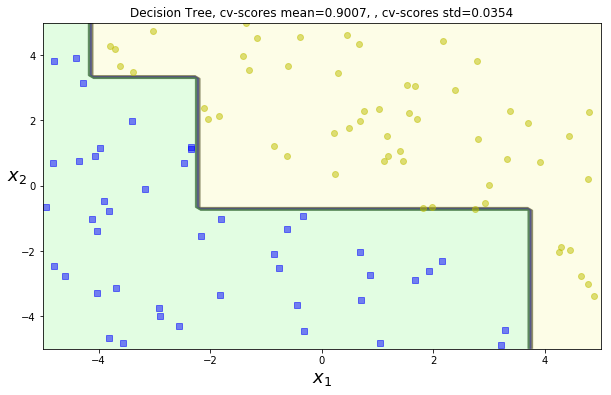

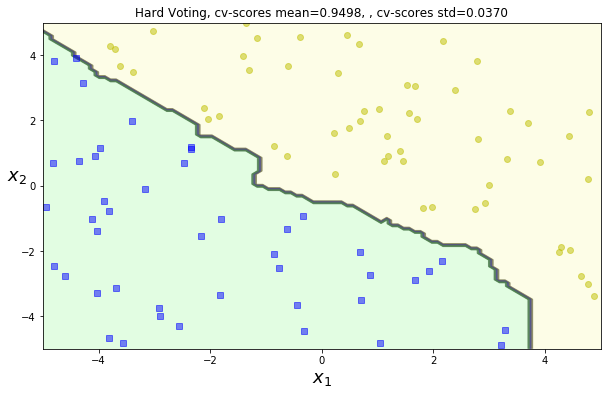

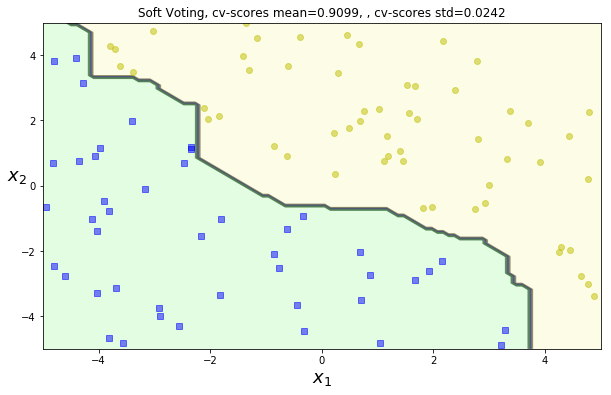

In [34]:
# loop through each model
for model, name in zip([lr, knn, tree, hard, soft], ['Logistic Regression', 'KNN', 'Decision Tree', 'Hard Voting', 'Soft Voting']):
    # fit
    model.fit(X, y)
    # cv scores
    cv_scores = cross_val_score(model, X, y)
    # plotting decision boundary + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('{}, cv-scores mean={:.4f}, , cv-scores std={:.4f}'.format(name, cv_scores.mean(), cv_scores.std()))
    plot_decision_boundary(model, X, y, axes=[-5, 5, -5, 5])

The data is linearly separable so logistic regression works extremely well. In this case the ensemble isn't as good because the other two estimators arent' that good and, I assume, because the problem is too simple for this model.

2 - Create a set of 100 random data points that lie on a unit circle displaced by some noise, categorizing each as being inside or outside the circle.  Stated analytically, select $x$ and $y$ such that $x^2 + y^2 = 1 + \epsilon$ where $\epsilon$ is a noise term.  Choose three classification algorithms, construct hard and soft ensemble voters, and fit all 5 models to your data, plotting the decision boundary for each (if possible).  Then, using cross-validation, report the training and testing accuracies for all but the ensembles.  Comment on your results.

In [63]:
# random numbers between 0 and 2*pi
np.random.seed(0)
x = 2*np.pi*np.random.rand(100)
noise = np.random.rand(100) - 0.5
X = np.vstack([np.cos(x)*(1+noise), np.sin(x)*(1+noise)]).T
y = np.array(noise > 0, dtype=int)

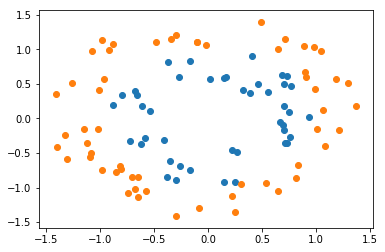

In [64]:
# plot the dataset
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1]);

In [73]:
svm = SVC(kernel='rbf', probability=True)
knn = KNeighborsClassifier()
forest = RandomForestClassifier()
hard = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('forest', forest)], voting='hard')
soft = VotingClassifier(estimators=[('svm', svm), ('knn', knn), ('forest', forest)], voting='soft')

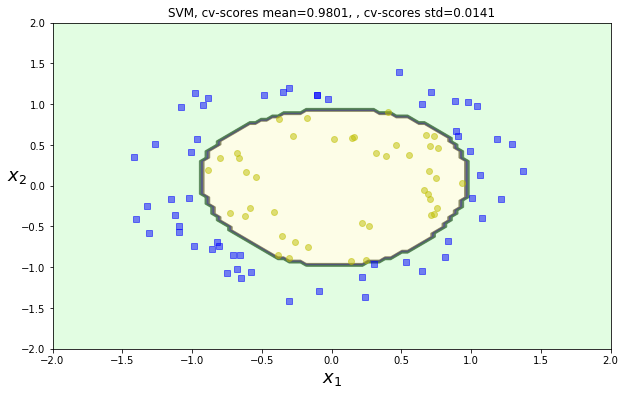

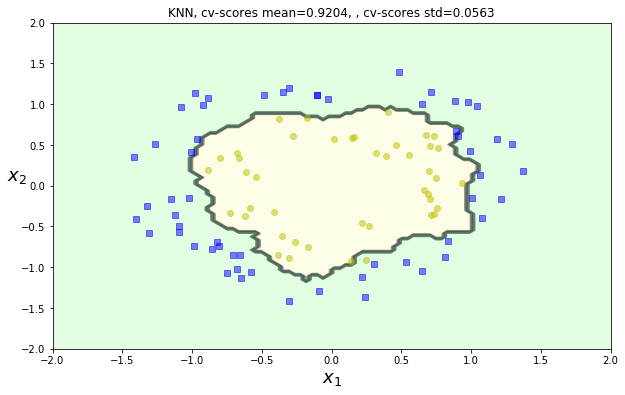

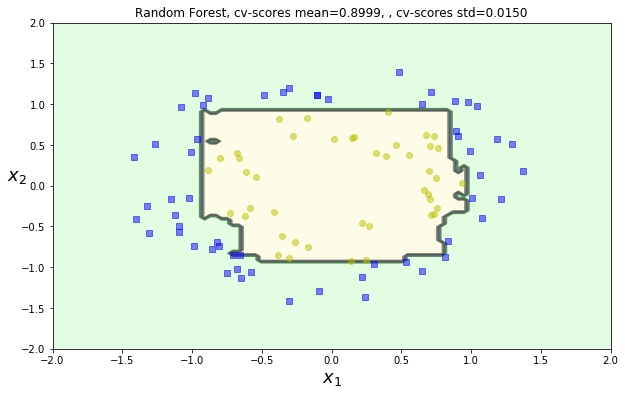

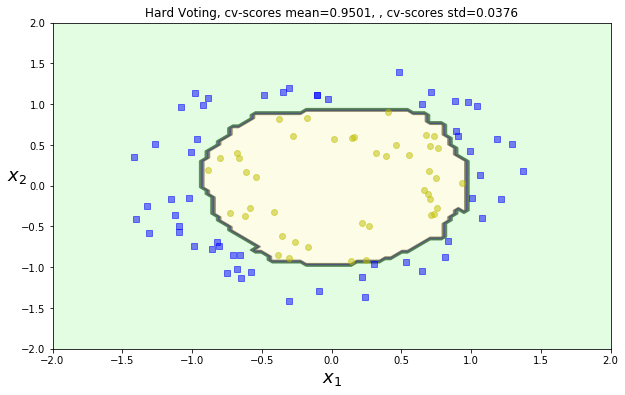

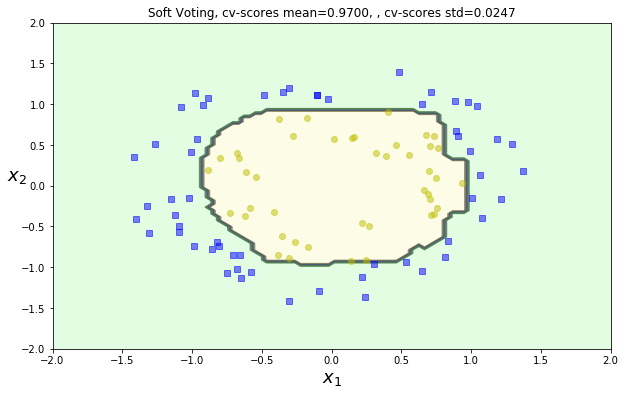

In [74]:
# loop through each model
for model, name in zip([svm, knn, forest, hard, soft], ['SVM', 'KNN', 'Random Forest', 'Hard Voting', 'Soft Voting']):
    # fit
    model.fit(X, y)
    # cv scores
    cv_scores = cross_val_score(model, X, y)
    # plotting decision boundary + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('{}, cv-scores mean={:.4f}, , cv-scores std={:.4f}'.format(name, cv_scores.mean(), cv_scores.std()))
    plot_decision_boundary(model, X, y, axes=[-2, 2, -2, 2])

As before we have SVM which is performing quite well so the ensembles aren't outperforming the best single model.

3 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Semeion Handwritten Digit Data Set](http://archive.ics.uci.edu/ml/datasets/Semeion+Handwritten+Digit), put it into a dataframe, and split into training and testing sets.  Then, using GridSearchCV and all the other tools you have at your disposal, fit the best possible model you can, making use of ensemble voting.  Report and comment on your results.

In [76]:
digits = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data', header=None, sep=' ')
digits.drop(266, axis=1, inplace=True)

In [97]:
# constructing a class label by multiplying the flag column by the digits+1 (to avoid multiplication by 0)
i = 1
class_labels = digits.loc[:, 256]*i
for n in range(257, 266):
    i += 1
    class_labels += digits.loc[:, n]*i
# subtracting one to get the right digit
class_labels = class_labels - 1
# adding the column and dropping all flags
digits['class_label'] = class_labels
for n in range(256, 266):
    digits.drop([n], axis=1, inplace=True)

In [107]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [109]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.drop('class_label', axis=1), digits.class_label,
                                                stratify=digits.class_label,
                                                test_size=0.2,
                                                random_state=0)

In [119]:
knn = KNeighborsClassifier() # n_neighbors
svm = SVC(kernel='rbf') # C
naive = MultinomialNB() # alpha
forest = RandomForestClassifier() # n_estimators, max_features
ensemble = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('naive', naive), ('forest', forest)], voting='hard')

In [164]:
reg_values = [0.003, 0.001, 0.03, 0.01, 0.3, 0.1, 1, 3, 10, 30, 100, 300]
neigh_values = np.arange(2, 11)
trees_values = np.arange(10, 60, 10)
feat_values = np.arange(0.2, 1.2, 0.2)

I'm going to tune each model by itself and then do the ensemble learning with the tuned models:

In [150]:
param_grid = [{'n_neighbors':neigh_values}]

gs = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=2)
gs.fit(Xtrain, ytrain)
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 5}
0.894819466248


In [148]:
param_grid = [{'max_features':feat_values, 'n_estimators':trees_values}]

gs = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=2)
gs.fit(Xtrain, ytrain)
print(gs.best_params_)
print(gs.best_score_)

{'max_features': 0.20000000000000001, 'n_estimators': 40}
0.912087912088


In [151]:
param_grid = [{'alpha':reg_values}]

gs = GridSearchCV(estimator=naive, param_grid=param_grid, cv=5, n_jobs=2)
gs.fit(Xtrain, ytrain)
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 0.003}
0.835164835165


In [152]:
param_grid = [{'C':reg_values}]

gs = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=2)
gs.fit(Xtrain, ytrain)
print(gs.best_params_)
print(gs.best_score_)

{'C': 30}
0.938775510204


Here I set the optimal hyperparameters, fit and score the ensemble:

In [153]:
ensemble.set_params(knn__n_neighbors=5, forest__max_features=0.2, forest__n_estimators=40, naive__alpha=0.003, svm__C=30)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('svm', SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [154]:
ensemble.fit(Xtrain, ytrain)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('svm', SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [156]:
cv_scores = cross_val_score(ensemble, Xtrain, ytrain)
np.mean(cv_scores), np.std(cv_scores)

(0.92696250635204702, 0.020545611848306139)

In [157]:
ensemble.score(Xtest, ytest)

0.94670846394984332

I get a test accuracy of 94.7%, which is quite good and better than the best scores obtained tuning each model.

Now I'm just plotting the confusion matrix to see how the ensemble predicts each digit:

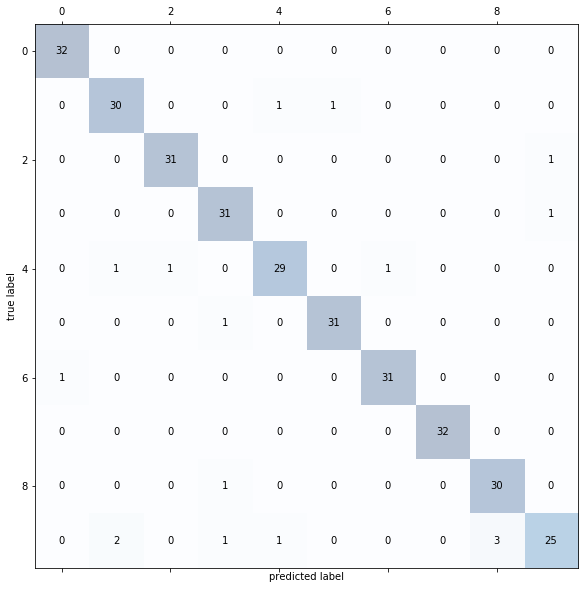

In [163]:
confmat = confusion_matrix(ytest, ensemble.predict(Xtest))

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label');

The 9s are the most difficult digits for this learner.

## Bagging and Boosting
As you saw above, a key issue to keep in mind when selecting the best model for you data is the bias/variance trade-off.  Here we'll take a look at a few other ensemble methods which relate to this issue, namely, bagging and boosting methods.  Broadly speaking, these methods work by taking a collection of identically prepared models, fitting them to the data, and then aggregating the results in some way to produce a final prediction, having better use for "strong" models, as in the case of bagging, or on "weak" models as in the case of boosting.

1 - Generate a set of 1000 random datapoints separated by a decaying sine curve defined by $$f(x) = e^{-\beta x}sin(\nu x)$$ on the range $-2\pi < x < 2\pi$, where $\beta =  \frac{1}{2.5}$ and $\nu = 10$, classify each as being above or below the curve, and split into training and testing sets.

In [4]:
np.random.seed(0)
# random points in the quadrant
x1 = 4*np.pi*np.random.rand(1000) - 2*np.pi
x2 = 4*np.pi*np.random.rand(1000) - 2*np.pi
X = np.vstack([x1, x2]).T
# classified by the damped oscillator
y = np.array(x2 < np.exp(-1/2.5*x1) * np.sin(10*x1), dtype=int)

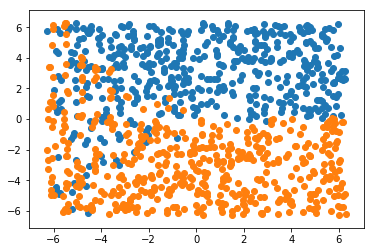

In [5]:
# plot the dataset
plt.scatter(x1[y==0], x2[y==0])
plt.scatter(x1[y==1], x2[y==1]);

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

2 - Fit two Tree Classifiers, one with default parameters, and another with `max_depth = 5`, and one other model of your choice to the data, report the training and testing accuracies, and plot the decision boundary.  Also perform 10 fold cross validation and report the mean and standard deviation.  Comment on your results.

In [8]:
tree1 = DecisionTreeClassifier()
tree2 = DecisionTreeClassifier(max_depth=5)
svm = SVC(kernel='rbf')

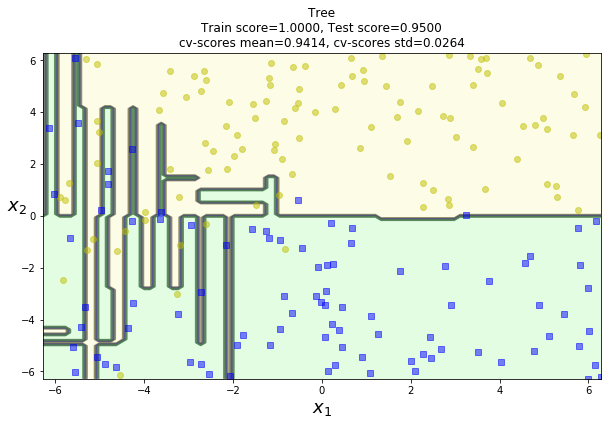

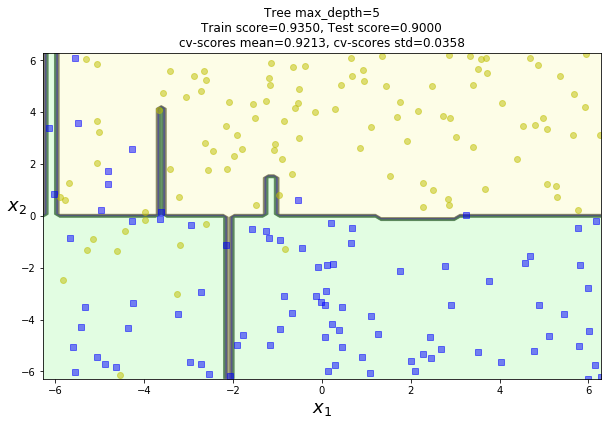

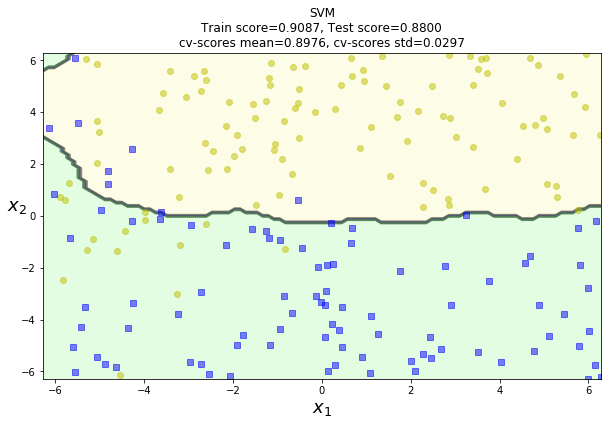

In [172]:
# loop through each model
for model, name in zip([tree1, tree2, svm], ['Tree', 'Tree max_depth=5', 'SVM']):
    # fit
    model.fit(Xtrain, ytrain)
    train_score = model.score(Xtrain, ytrain)
    test_score = model.score(Xtest, ytest)
    # cv scores
    cv_scores = cross_val_score(model, Xtrain, ytrain, cv=10)
    # plotting decision boundary + train-test scores + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('{}\nTrain score={:.4f}, Test score={:.4f}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'.format(name,
                                                                                                              train_score,
                                                                                                              test_score,
                                                                                                              cv_scores.mean(),
                                                                                                              cv_scores.std()))
    plot_decision_boundary(model, Xtest, ytest, axes=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])

The first tree is clearly overfitting but it gets good accuracy nonetheless, the decision boundary is really complex and far from the true function.

The second tree isn't complex enough in contrast and it has little overfitting; the SVM is very far away from the real function although its accuracy is still very good.

3 - Using each of the models you fit in part (2), perform bagging with `bootstrap = True` and with `bootstrap = False`, report the training and testing accuracies, and plot the decision boundary.  Also perform 10 fold cross validation and report the mean and standard deviation.  Comment on your results.

In [175]:
bag1 = BaggingClassifier(n_estimators=50, max_samples=0.5, bootstrap=True)
bag2 = BaggingClassifier(n_estimators=50, max_samples=0.5, bootstrap=False)

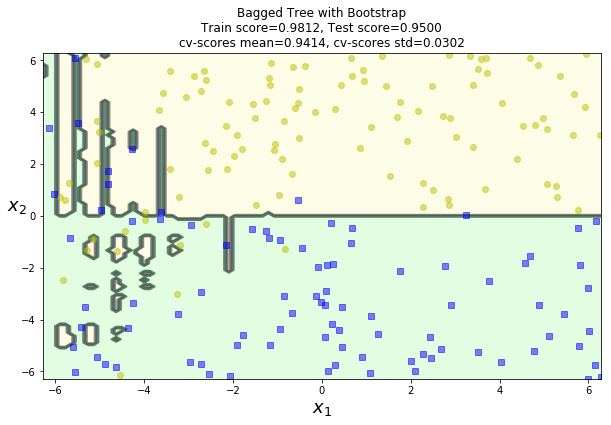

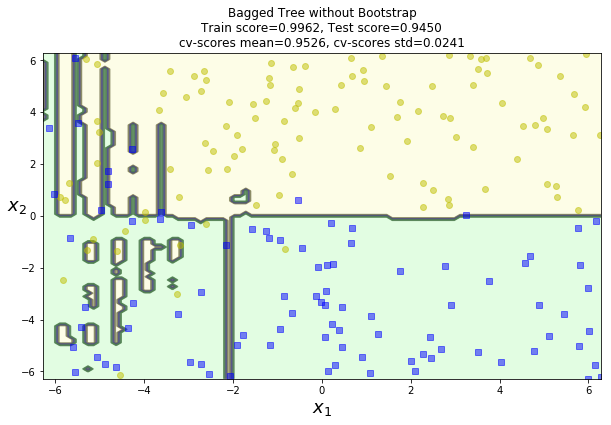

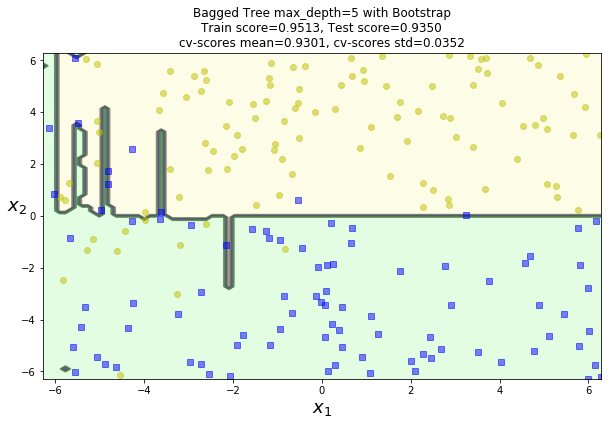

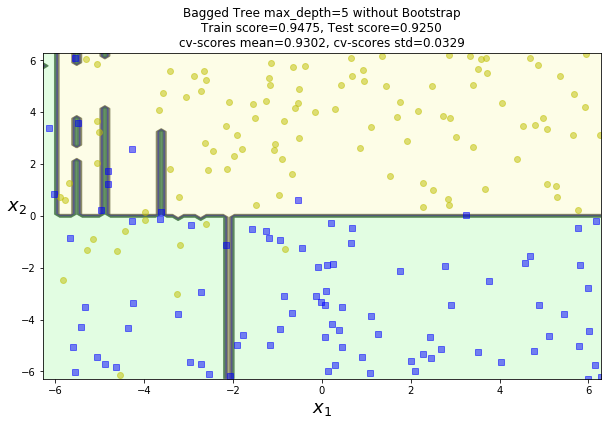

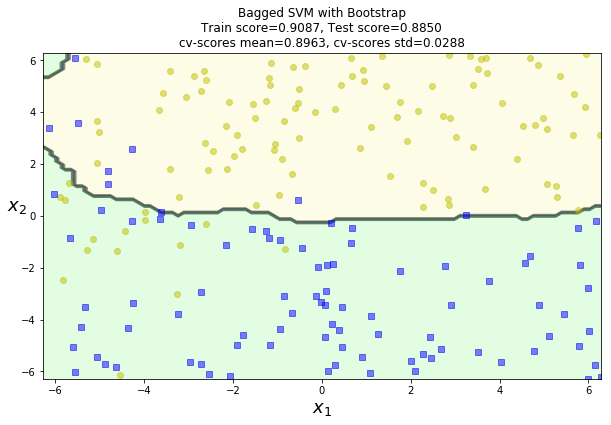

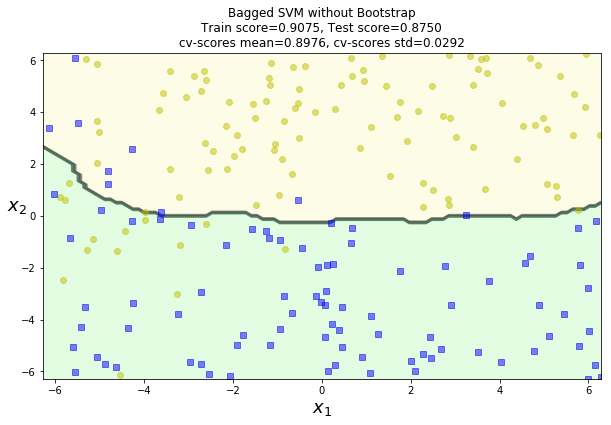

In [176]:
# loop through each model
for model, name in zip([tree1, tree2, svm], ['Tree', 'Tree max_depth=5', 'SVM']):
    # set bagging estimator
    bag1.set_params(base_estimator=model)
    bag2.set_params(base_estimator=model)
    
    # bagging with bootstrap
    # fit
    bag1.fit(Xtrain, ytrain)
    train_score = bag1.score(Xtrain, ytrain)
    test_score = bag1.score(Xtest, ytest)
    # cv scores
    cv_scores = cross_val_score(bag1, Xtrain, ytrain, cv=10)
    # plotting decision boundary + train-test scores + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('Bagged {} with Bootstrap\nTrain score={:.4f}, Test score={:.4f}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'\
                  .format(name,
                          train_score,
                          test_score,
                          cv_scores.mean(),
                          cv_scores.std()))
    plot_decision_boundary(bag1, Xtest, ytest, axes=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    
    # bagging without bootstrap
    # fit
    bag2.fit(Xtrain, ytrain)
    train_score = bag2.score(Xtrain, ytrain)
    test_score = bag2.score(Xtest, ytest)
    # cv scores
    cv_scores = cross_val_score(bag2, Xtrain, ytrain, cv=10)
    # plotting decision boundary + train-test scores + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('Bagged {} without Bootstrap\nTrain score={:.4f}, Test score={:.4f}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'\
                  .format(name,
                          train_score,
                          test_score,
                          cv_scores.mean(),
                          cv_scores.std()))
    plot_decision_boundary(bag2, Xtest, ytest, axes=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])

With SVM I don't see much difference, with the trees the decision boundaries are much smoother and for the full tree is very precise (though the test precision is the same we have less overfitting).

The best improvement though is for the second tree which is 3.5% better on the test set.

Also, in general the bootstrap method gives better results than the pasting method.

4 - Repeat part (3), but this time using AdaBoost.

In [181]:
ada = AdaBoostClassifier(n_estimators=50, algorithm='SAMME.R')
svm.set_params(probability=True);

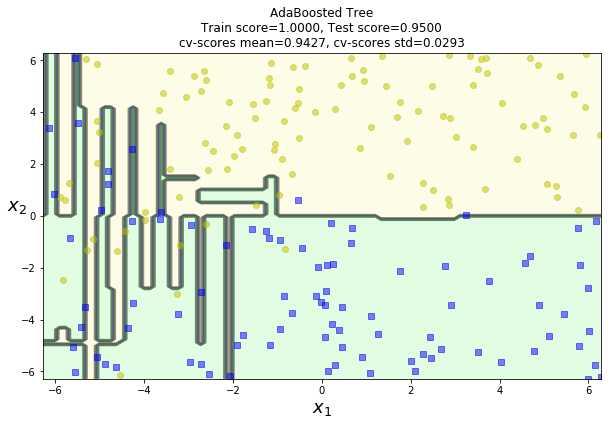

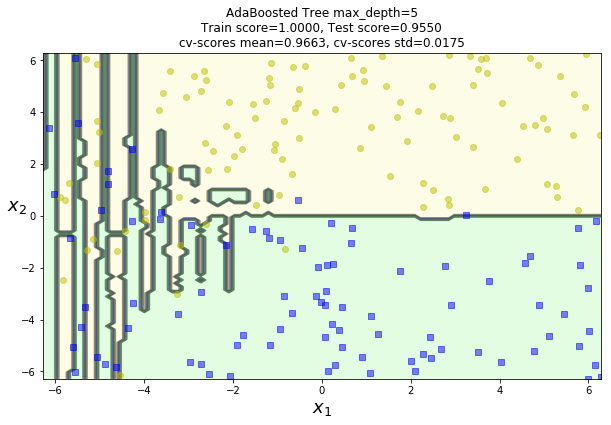

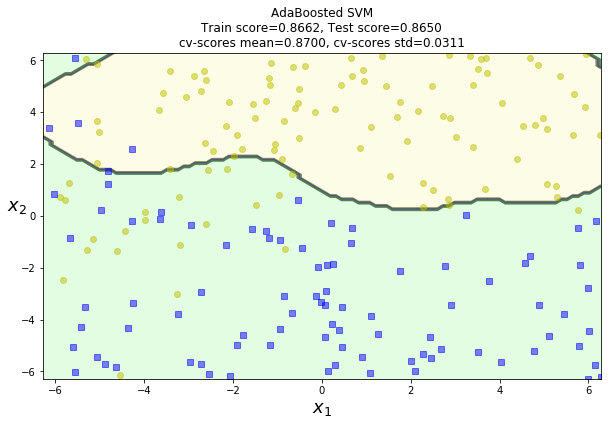

In [182]:
# loop through each model
for model, name in zip([tree1, tree2, svm], ['Tree', 'Tree max_depth=5', 'SVM']):
    # set AdaBoost estimator
    ada.set_params(base_estimator=model)
    # fit
    ada.fit(Xtrain, ytrain)
    train_score = ada.score(Xtrain, ytrain)
    test_score = ada.score(Xtest, ytest)
    # cv scores
    cv_scores = cross_val_score(ada, Xtrain, ytrain, cv=10)
    # plotting decision boundary + train-test scores + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('AdaBoosted {}\nTrain score={:.4f}, Test score={:.4f}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'\
                  .format(name,
                          train_score,
                          test_score,
                          cv_scores.mean(),
                          cv_scores.std()))
    plot_decision_boundary(ada, Xtest, ytest, axes=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])

The first tree seems identical to the non-boosted one, while the second has become almost identical to the first and is slightly better. Still, nothing to do for SVM...

5 - Perform a GridSearchCV for the `learning_rate` and `n_estimators` parameters for Gradient Boosting, the fit the best model to the data, report CV variance and accuracy as before, report training and testing accuracies, and plot the decision boundary.  Comment on your results.

In [43]:
gbc = GradientBoostingClassifier()

In [48]:
learn_range = np.arange(0.1, 1.1, 0.1)
est_range = [10, 30, 100, 300, 1000]
param_grid = [{'learning_rate':learn_range, 'n_estimators':est_range}]

gs = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), 'n_estimators': [10, 30, 100, 300, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
gs.best_params_, gs.best_score_

({'learning_rate': 0.59999999999999998, 'n_estimators': 300},
 0.96250000000000002)

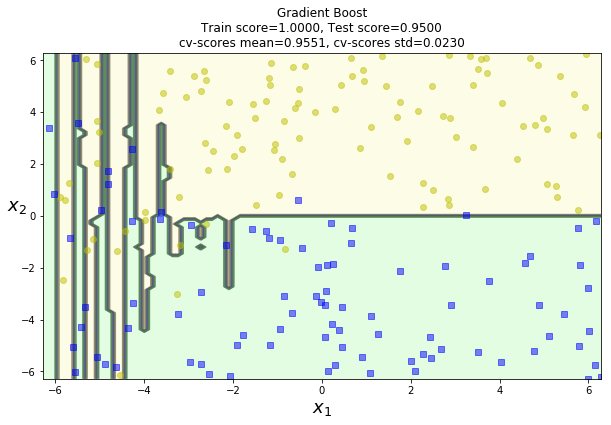

In [51]:
gbc.set_params(learning_rate=0.6, n_estimators=300)
gbc.fit(Xtrain, ytrain)

train_score = gbc.score(Xtrain, ytrain)
test_score = gbc.score(Xtest, ytest)
# cv scores
cv_scores = cross_val_score(gbc, Xtrain, ytrain, cv=10)
# plotting decision boundary + train-test scores + cv scores
plt.figure(figsize=(10, 6))
plt.title('Gradient Boost\nTrain score={:.4f}, Test score={:.4f}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'\
              .format(train_score,
                      test_score,
                      cv_scores.mean(),
                      cv_scores.std()))
plot_decision_boundary(gbc, Xtest, ytest, axes=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])

The accuracy is very good, similar to the bagged full decision tree.

6 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Breast Cancer Wisconsin (Diagnostic) Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/), put it into a dataframe, and split into training and testing sets.

In [52]:
breast = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                     header=None)

breast.columns = ['id','clump_thickness','uniformity_cell_size','uniformity_cell_shape','marginal_adhesion',
                'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']

In [53]:
breast.bare_nuclei = breast.bare_nuclei.apply(lambda x: x.replace('?', '1'))
breast.bare_nuclei = pd.to_numeric(breast.bare_nuclei)

In [55]:
# 2 for benign, 4 for malignant
le = LabelEncoder()
le.fit([2, 4])
breast['class'] = le.transform(breast['class'])

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(breast.drop('class', axis=1), breast['class'], test_size=0.2, random_state=0)

7 - Fit full and shallow decision tree models to the data using either bagging or boosting for each.  Then fit a random forest model.  Report cross-validation accuracies and variance, as well as training and testing arruracies for each model.  Comment on your results.

In [59]:
tree_full = DecisionTreeClassifier()
tree_shallow = DecisionTreeClassifier(max_depth=1)

In [61]:
bag_full = BaggingClassifier(tree_full, n_estimators=500)
boost_shallow = AdaBoostClassifier(tree_full, n_estimators=500)
forest = RandomForestClassifier(n_estimators=500)

In [62]:
for model, name in zip([bag_full, boost_shallow, forest], ['bagging full tree', 'boosting shallow trees', 'forest']):
    model.fit(Xtrain, ytrain)
    cv_scores = cross_val_score(model, Xtrain, ytrain)
    train_score = model.score(Xtrain, ytrain)
    test_score = model.score(Xtest, ytest)
    print('{}\ncv mean={}, cv std={}\nTrain accuracy={}, Test accuracy={}'.format(name,
                                                                                  np.mean(cv_scores),
                                                                                  np.std(cv_scores), 
                                                                                  train_score, 
                                                                                  test_score))

bagging full tree
cv mean=0.9553025511279781, cv std=0.013298619389161388
Train accuracy=1.0, Test accuracy=0.9642857142857143
boosting shallow trees
cv mean=0.9409752170662986, cv std=0.007523298585622078
Train accuracy=1.0, Test accuracy=0.9357142857142857
forest
cv mean=0.9535200199336821, cv std=0.015282947065455374
Train accuracy=1.0, Test accuracy=0.9785714285714285


The best results are for bagged full regression trees and random forest, while the boosted trees aren't quite as good. All models have 100% training accuracy but different generalizations.

8 - Fit a Gradient Boost model to the data, tuning the parameters.  Report the training and testing accuracies and the cross-validation mean and standard deviation of the best model.  Comment on your results.

In [7]:
gbc = GradientBoostingClassifier()

In [8]:
learn_range = np.arange(0.1, 1.1, 0.1)
est_range = [10, 30, 100, 300, 1000]
param_grid = [{'learning_rate':learn_range, 'n_estimators':est_range}]

gs = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), 'n_estimators': [10, 30, 100, 300, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
gs.best_params_, gs.best_score_

({'learning_rate': 0.59999999999999998, 'n_estimators': 300},
 0.96250000000000002)

In [10]:
gbc.set_params(learning_rate=0.1, n_estimators=1000)
gbc.fit(Xtrain, ytrain)

train_score = gbc.score(Xtrain, ytrain)
test_score = gbc.score(Xtest, ytest)
# cv scores
cv_scores = cross_val_score(gbc, Xtrain, ytrain, cv=10)
print('Gradient Boost\nTrain score={:.4f}, Test score={:.4f}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'\
              .format(train_score,
                      test_score,
                      cv_scores.mean(),
                      cv_scores.std()))

Gradient Boost
Train score=1.0000, Test score=0.9650
cv-scores mean=0.9563, cv-scores std=0.0178


We get better accuracy than the previous models.

9 - Repeat part (7) using another classification model of your choice, performing either bagging or boosting.  Comment on your results.

In [11]:
lr = LogisticRegression()
boost_lr = AdaBoostClassifier(lr)

In [18]:
param_grid = [{
    'learning_rate':np.arange(0.1, 1.1, 0.1),
    # 'n_estimators':np.arange(50, 550, 50),
    'base_estimator__C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
}]

gs = GridSearchCV(boost_lr, param_grid=param_grid, cv=10, n_jobs=2)
gs.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'learning_rate': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), 'base_estimator__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
gs.best_params_, gs.best_score_

({'base_estimator__C': 0.3, 'learning_rate': 1.0}, 0.90000000000000002)

In [21]:
lr.fit(Xtrain, ytrain)
cv_scores = cross_val_score(lr, Xtrain, ytrain)
train_score = lr.score(Xtrain, ytrain)
test_score = lr.score(Xtest, ytest)
print('cv mean={}, cv std={}\nTrain accuracy={}, Test accuracy={}'.format(np.mean(cv_scores),
                                                                          np.std(cv_scores), 
                                                                          train_score, 
                                                                          test_score))

cv mean=0.8974871636018885, cv std=0.009493883439372682
Train accuracy=0.8925, Test accuracy=0.885


In [22]:
boost_lr.set_params(base_estimator__C=0.3, learning_rate=1.0)
boost_lr.fit(Xtrain, ytrain)
cv_scores = cross_val_score(boost_lr, Xtrain, ytrain)
train_score = boost_lr.score(Xtrain, ytrain)
test_score = boost_lr.score(Xtest, ytest)
print('cv mean={}, cv std={}\nTrain accuracy={}, Test accuracy={}'.format(np.mean(cv_scores),
                                                                          np.std(cv_scores), 
                                                                          train_score, 
                                                                          test_score))

cv mean=0.9024996949302094, cv std=0.006118513472520807
Train accuracy=0.8975, Test accuracy=0.885


There is no improvement and the results are way worse than before, let's try bagging:

In [23]:
bagg_lr = BaggingClassifier(lr)

In [26]:
param_grid = [{
    'max_samples':np.arange(0.1, 1.1, 0.1),
    # 'n_estimators':np.arange(50, 550, 50),
    'base_estimator__C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
}]

gs = GridSearchCV(bagg_lr, param_grid=param_grid, cv=10, n_jobs=2)
gs.fit(Xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingClassifier(base_estimator=LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'max_samples': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), 'base_estimator__C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
gs.best_params_, gs.best_score_

({'base_estimator__C': 0.01, 'max_samples': 0.70000000000000007},
 0.89875000000000005)

In [29]:
bagg_lr.set_params(base_estimator__C=0.01, max_samples=0.7)
bagg_lr.fit(Xtrain, ytrain)
cv_scores = cross_val_score(bagg_lr, Xtrain, ytrain)
train_score = bagg_lr.score(Xtrain, ytrain)
test_score = bagg_lr.score(Xtest, ytest)
print('cv mean={}, cv std={}\nTrain accuracy={}, Test accuracy={}'.format(np.mean(cv_scores),
                                                                          np.std(cv_scores), 
                                                                          train_score, 
                                                                          test_score))

cv mean=0.8949902847005152, cv std=0.006289313195949913
Train accuracy=0.90125, Test accuracy=0.89


A bit better, but still worse than the trees.

## [Optional] - Advanced Random Forests
The final topics we'll look at here incorporate many of the same ideas that you encountered when working with Random Forests, namely Extremely Random Trees and Totally Random Trees, both of which have very different uses.  Extremely Random Trees serves as an extension to Random Forests, adding an additional level of randomness to tree construction whereas Totally Random Trees is a data transformation which may improve classification when used in tandem with another classifier.

1 - Generate a set of 100 random data points, half from the unit circle, and half from a circle of radius 1.5.  Stated analytically choose  $x$ and $y$ such that $x^2 + y^2 = R^2 + \epsilon$ where $\epsilon$ is a noise term and $R$ is the circle radius.  Then fit a Random Forest, Extra Trees Classifier, and one other model of your choice to the data.  Report the training accuracies and cross-validation means and variances, plot the decision boundaries, and comment on your results.

In [4]:
from sklearn.ensemble import ExtraTreesClassifier, RandomTreesEmbedding
from sklearn.pipeline import Pipeline

In [5]:
# random numbers between 0 and 2*pi
np.random.seed(0)
x = 2*np.pi*np.random.rand(100)
# half on a circle, half on the other
half = np.array([0]*50 + [1]*50)
np.random.shuffle(half)
X = np.vstack([np.cos(x)*(1+half*0.5), np.sin(x)*(1+half*0.5)]).T
y = half

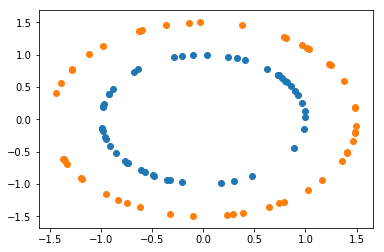

In [6]:
# plot the dataset
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1]);

In [7]:
extra = ExtraTreesClassifier()
forest = RandomForestClassifier()
svm = SVC(kernel='rbf', probability=True)

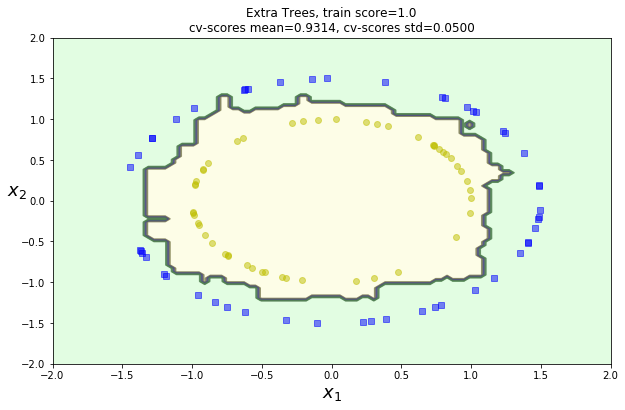

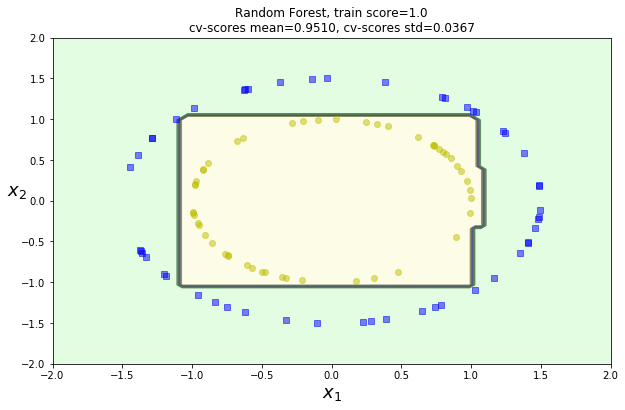

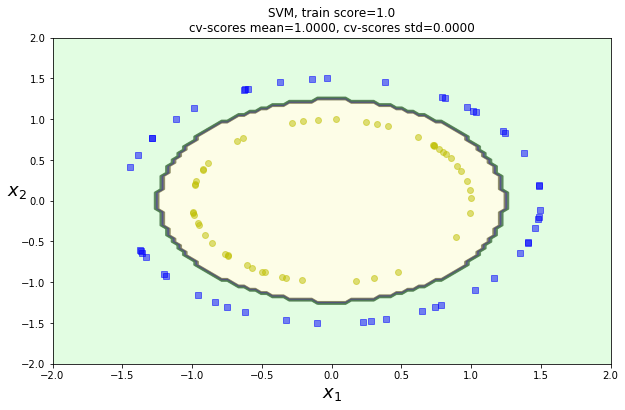

In [8]:
# loop through each model
for model, name in zip([extra, forest, svm], ['Extra Trees', 'Random Forest', 'SVM']):
    # fit
    model.fit(X, y)
    train_score = model.score(X, y)
    # cv scores
    cv_scores = cross_val_score(model, X, y)
    # plotting decision boundary + cv scores
    plt.figure(figsize=(10, 6))
    plt.title('{}, train score={}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'.format(name, train_score, cv_scores.mean(), cv_scores.std()))
    plot_decision_boundary(model, X, y, axes=[-2, 2, -2, 2])

The best boundary is from the SVM, the extra trees fits the data better than the random forest (the boundary is smoother).

2 - Repeat part (1), but this time transforming the data using a Totally Random Trees hash prior to fitting.

In [10]:
rte = RandomTreesEmbedding()
rte.fit(X, y)
X_trans = rte.transform(X)

In [12]:
# loop through each model
for model, name in zip([extra, forest, svm], ['Extra Trees', 'Random Forest', 'SVM']):
    # fit
    model.fit(X_trans, y)
    train_score = model.score(X_trans, y)
    # cv scores
    cv_scores = cross_val_score(model, X_trans, y)
    print('{}, train score={}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'.format(name, train_score, cv_scores.mean(), cv_scores.std()))

Extra Trees, train score=1.0
cv-scores mean=0.8885, cv-scores std=0.0551
Random Forest, train score=1.0
cv-scores mean=0.8591, cv-scores std=0.0582
SVM, train score=0.9
cv-scores mean=0.7194, cv-scores std=0.0531


Extra trees is slightly better, the other two model are worse than before, especially SVM!

3 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Madelon Data Set](http://archive.ics.uci.edu/ml/datasets/Madelon) (train data and labels), put it into a dataframe, and split into training and testing sets.  Then, using Totally Random Trees and all the other tools you have at your disposal, fit a Random Forest, an Extremely Random Forest, and one other algorithm of your choice to the data.  Report the cross-validation mean and variance as well as the training and testing accuracies.  Comment on your results.

In [13]:
madelon = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data',
                      sep=' ',
                      header=None)
madelon.drop(500, axis=1, inplace=True)
madelon_labels = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels',
                             header=None)
Xtrain, Xtest, ytrain, ytest = train_test_split(madelon, madelon_labels, test_size=0.2, random_state=0)

In [14]:
madelon.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,481.7225,6.421769,462.0,477.00,482.0,486.00,503.0
1,2000.0,483.4525,30.186294,381.0,464.00,483.0,503.00,600.0
2,2000.0,510.1660,38.899165,370.0,485.00,510.5,536.00,654.0
3,2000.0,483.3845,9.059895,453.0,477.00,483.0,490.00,519.0
4,2000.0,501.6125,41.389418,371.0,475.00,500.0,528.00,688.0
5,2000.0,479.2590,6.795956,459.0,475.00,479.0,484.00,505.0
6,2000.0,480.1095,40.575925,334.0,452.75,480.0,506.25,611.0
7,2000.0,476.5650,1.384461,471.0,476.00,477.0,477.00,481.0
8,2000.0,486.7935,15.043836,430.0,477.00,487.0,496.25,536.0
9,2000.0,478.7890,7.190920,455.0,474.00,479.0,484.00,503.0


In [16]:
pipe_rf = Pipeline([
    ('rte', RandomTreesEmbedding()),
    ('clf', RandomForestClassifier())
])

pipe_xt = Pipeline([
    ('rte', RandomTreesEmbedding()),
    ('clf', ExtraTreesClassifier())
])

pipe_knn = Pipeline([
    ('rte', RandomTreesEmbedding()),
    ('clf', KNeighborsClassifier())
])

In [17]:
# loop through each model
for model, name in zip([pipe_rf, pipe_xt, pipe_knn], ['Random Forest', 'Extra Trees', 'KNN']):
    # fit
    model.fit(Xtrain, ytrain.values.ravel())
    train_score = model.score(Xtrain, ytrain.values.ravel())
    test_score = model.score(Xtest, ytest.values.ravel())
    # cv scores
    cv_scores = cross_val_score(model, Xtrain, ytrain.values.ravel())
    print('{}, train score={}, test score={}\ncv-scores mean={:.4f}, cv-scores std={:.4f}'.format(name, train_score, test_score, cv_scores.mean(), cv_scores.std()))

Random Forest, train score=0.96875, test score=0.5125
cv-scores mean=0.4982, cv-scores std=0.0341
Extra Trees, train score=0.993125, test score=0.545
cv-scores mean=0.5200, cv-scores std=0.0252
KNN, train score=0.7025, test score=0.475
cv-scores mean=0.5038, cv-scores std=0.0151


Not bad (if I remember correctly this dataset is hard to classify) but we have a lot of overfitting with both random forest and extra trees, while K-nearest neighbors is performing slightly worse.